In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [76]:
gray = cv2.imread('dsu7.jpg',0)

In [77]:
edges = cv2.Canny(gray,150,200,apertureSize = 3)

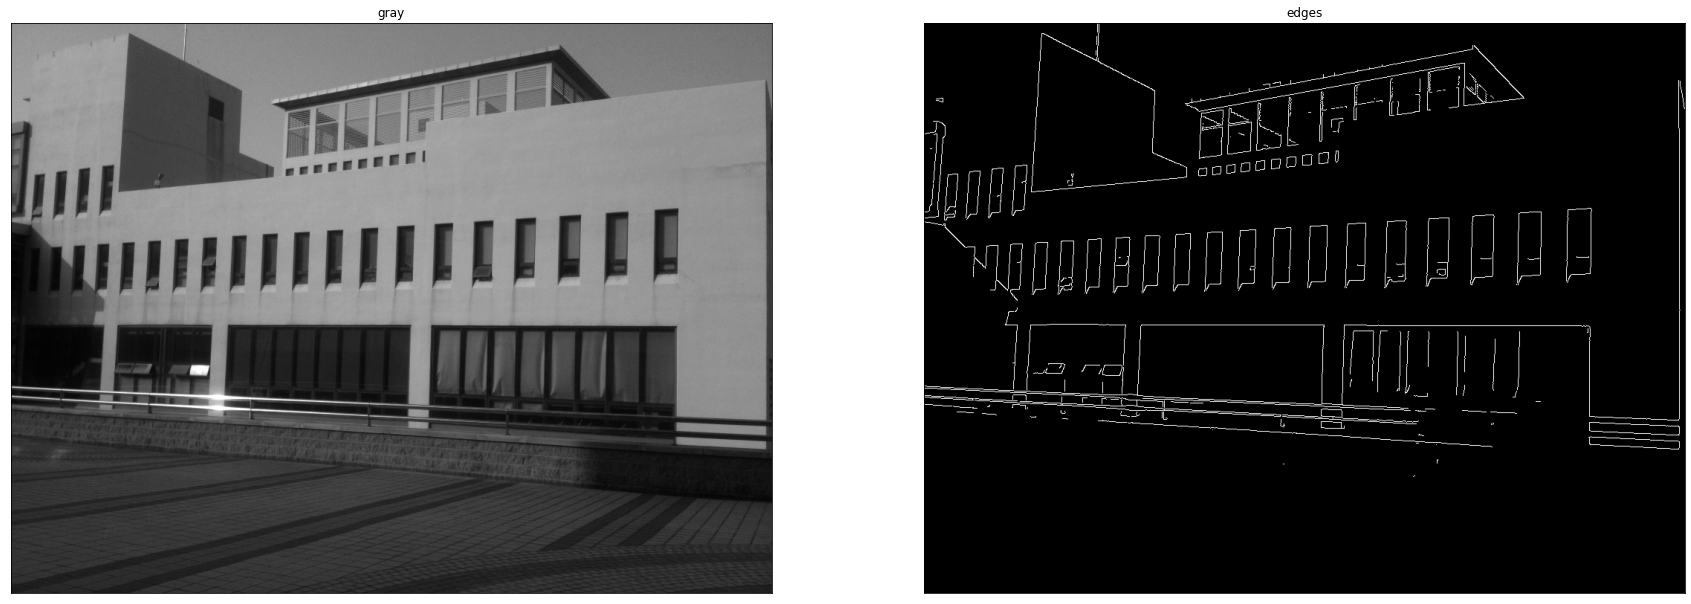

In [78]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [79]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)
lines.shape[0]

22

In [80]:
img = cv2.imread('dsu7.jpg')
for i in range(lines.shape[0]):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2.imwrite('houghlines3.jpg',img)

True

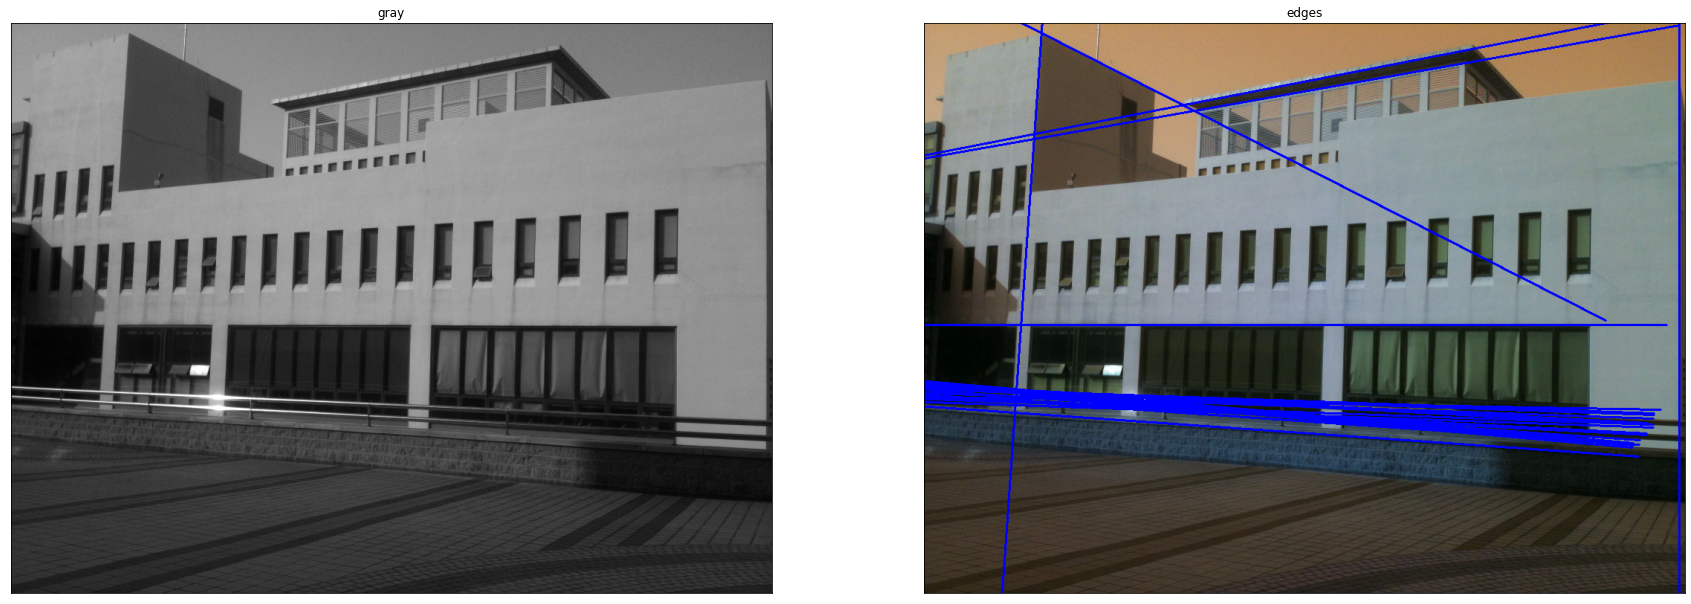

In [81]:
plt.figure(figsize=(30,45))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.show()

In [82]:
def nothing(x):
    pass

In [63]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 100, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 100, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    img_rgb = cv2.imread('dsu7.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

## Probabilistic Hough Transform

In [83]:
def nothing(x):
    pass

In [84]:
cv2.namedWindow('image')
cv2.createTrackbar('minLineLength', 'image', 1, 500, nothing)
cv2.createTrackbar('maxLineGap', 'image', 1, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 500, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    lineLength = cv2.getTrackbarPos('minLineLength', 'image')
    lineGap = cv2.getTrackbarPos('maxLineGap', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLinesP(edges,rho = 1,theta = np.pi/180,threshold = 100,minLineLength = lineLength,maxLineGap = lineGap)
    
    img_rgb = cv2.imread('dsu7.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])+"minLineLength:"+str(lineLength)  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()